# Visualização de dados do Dataset titanic.csv, disponível no [Kaggle](https://www.kaggle.com/competitions/titanic)

## Data Dictionary

| Variable | Definition                                     | Key                                               |
| --------- | --------------------------------------------- | ------------------------------------------------- |
| Variable  | Survival                                      | 0 = No, 1 = Yes                                   |
| pclass    | Ticket class                                  | 1 = 1st, 2 = 2nd, 3 = 3rd                         |
| sex	    | Sex                                           |                                                   |
| Age	    | Age in years                                  |	                                                |
| sibsp	    |# of siblings / spouses aboard the Titanic     |                                                   |
| parch	    | # of parents / children aboard the Titanic	|                                                   |
| ticket	| Ticket number                                 |                                                   |
| fare	    | Passenger fare                                |                                                   |
| cabin	    | Cabin number	                                |                                                   |
| embarked	| Port of Embarkation	                        | C = Cherbourg, Q = Queenstown, S = Southampton    |

#### Variable Notes
- **pclass**: A proxy for socio-economic status (SES)
  
    1st = Upper

    2nd = Middle
    
    3rd = Lower

- **age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- **sibsp**: The dataset defines family relations in this way...

    Sibling = brother, sister, stepbrother, stepsister

    Spouse = husband, wife (mistresses and fiancés were ignored)

- **parch**: The dataset defines family relations in this way...

    Parent = mother, father

    Child = daughter, son, stepdaughter, stepson
    Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans

## Pré-Processamento

In [2]:
titanic_df = pd.read_csv("titanic.csv")

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Verificando dados ausentes

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Removendo dados nulos da coluna `Age`

In [5]:
titanic_df = titanic_df[titanic_df["Age"].notna()]

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


### Filtrando apenas colunas de interesse
Para a Visualização de Dados, serão utilizadas somente as colunas:
- `PassengerId`: Chave primária da tabela
- `Survived`: Diz se o passageiro sobreviveu ou não
  - 0 = Não
  - 1 = Sim
- `Pclass`: A classe do Passageiro.
  - 1 = 1ª classe
  - 2 = 2ª classe
  - 3 = 3ª classe
- `Sex`: Masculino ou Feminio.
  - male = masculino
  - female = femininno
- `Age`: Idade do Passageiro.
- `Embarked`: Porto de embarque do passageiro.
  - C = Cherbourg
  - Q = Queenstown
  - S = Southampton

In [7]:
titanic_df = titanic_df.loc[:, ["PassengerId", "Survived", "Pclass", "Sex", "Age", "Embarked"]]

In [8]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0,3,male,22.0,S
1,2,1,1,female,38.0,C
2,3,1,3,female,26.0,S
3,4,1,1,female,35.0,S
4,5,0,3,male,35.0,S


#### Conversão do tipo de dados da coluna `Sex` de string para numérico

In [9]:
titanic_df["Sex"].replace("male", 0, inplace=True)
titanic_df["Sex"].replace("female", 1, inplace=True)

#### Conversão do tipo de dados da coluna `Embarked` de string para numérico

In [10]:
titanic_df["Embarked"].replace("C", 0, inplace=True)
titanic_df["Embarked"].replace("Q", 1, inplace=True)
titanic_df["Embarked"].replace("S", 2, inplace=True)

In [11]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Sex          714 non-null    int64  
 4   Age          714 non-null    float64
 5   Embarked     712 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 39.0 KB


## Visualização de Dados

### Idade

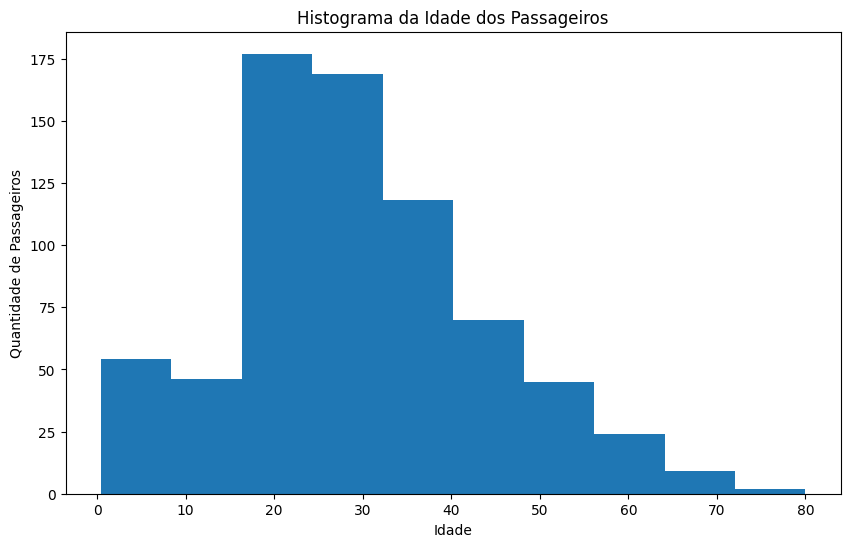

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.hist(titanic_df["Age"])

ax.set_title("Histograma da Idade dos Passageiros")
ax.set_xlabel("Idade")
ax.set_ylabel("Quantidade de Passageiros")
plt.show()

O Histograma da Idade dos Passageiros mostra que a maior parte destes tinham entre 20 e 30 anos. O que confirmamos analisando a mediana das idades.

In [13]:
titanic_df["Age"].median()

28.0

### Sexo

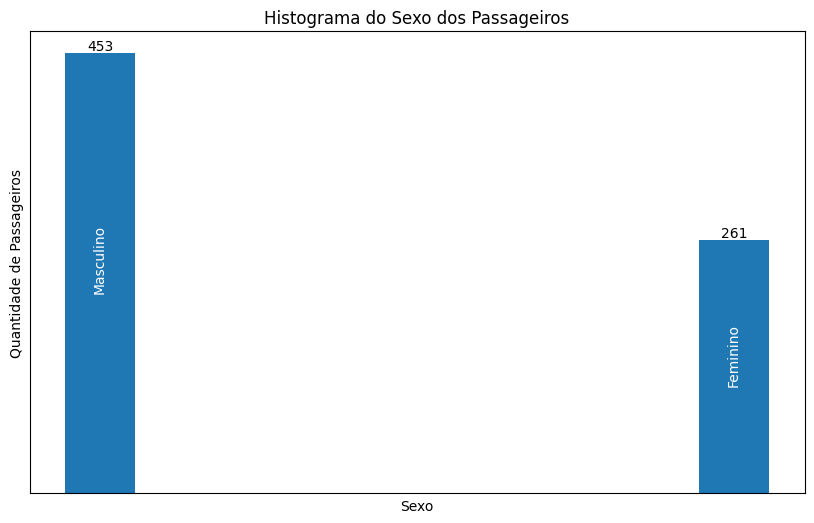

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.hist(titanic_df["Sex"])

ax.set_title("Histograma do Sexo dos Passageiros")
ax.set_xlabel("Sexo")
ax.set_ylabel("Quantidade de Passageiros")

qtd_male = titanic_df[titanic_df["Sex"] == 0]["Sex"].count()
qtd_female = titanic_df[titanic_df["Sex"] == 1]["Sex"].count()

ax.text(0.05, qtd_male + 0.05, qtd_male, ha="center", va="bottom")
ax.text(0.95, qtd_female + 0.05, qtd_female, ha="center", va="bottom")

ax.set_xticks([])
ax.set_yticks([])

ax.text(0.05, 206.5, "Masculino", ha="center", va="bottom", rotation=90, color="white")
ax.text(0.95, 110.5, "Feminino", ha="center", va="bottom", rotation=90, color="white")
plt.show()

A partir do Histograma do Sexo dos Passageiros, visualizamos que a maior parte dos tripulantes era do Sexo Masculino.

### Local de Embarque

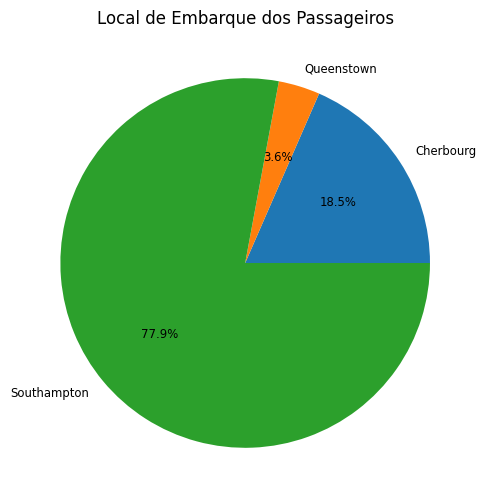

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

embarked_df = titanic_df.groupby(["Embarked"]).sum()
labels = ["Cherbourg", "Queenstown", "Southampton"]
sizes = embarked_df["PassengerId"]

plt.pie(sizes, labels=labels, autopct="%1.1f%%", textprops={"size": "smaller"})

ax.set_title("Local de Embarque dos Passageiros")

plt.show()

In [16]:
titanic_df["Embarked"].value_counts()

Embarked
2.0    554
0.0    130
1.0     28
Name: count, dtype: int64

A partir do Gráfico de Pizza do Local de Embarque dos Passageiros concluímos que quase 80% embarcou no porto de Southampton.

### Classe

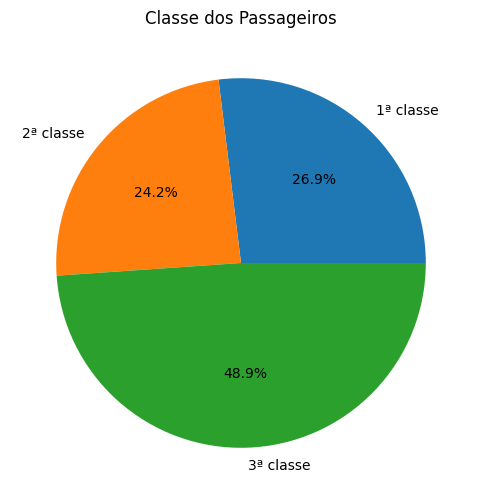

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

embarked_df = titanic_df.groupby(["Pclass"]).sum()
labels = ["1ª classe", "2ª classe", "3ª classe"]
sizes = embarked_df["PassengerId"]

plt.pie(sizes, labels=labels, autopct="%1.1f%%")

ax.set_title("Classe dos Passageiros")

plt.show()

In [18]:
titanic_df["Pclass"].value_counts()

Pclass
3    355
1    186
2    173
Name: count, dtype: int64

A partir deste gráfico, concluímos que quase metade dos passageiros eram da 3ª classe, enquanto pouco menos de 1/4 era da 2ª classe e pouco mais de 1/4 era da 1ª classe.

## Visualização de Dados Agregados

### Sobreviventes por Sexo

In [19]:
survivors_by_sex = titanic_df.loc[(titanic_df["Survived"] == 1)][["Sex", "Survived"]].groupby("Sex")["Survived"].sum()
deaths_by_sex = titanic_df.loc[(titanic_df["Survived"] == 0)][["Sex", "Survived"]].groupby("Sex")["Survived"].count()

In [20]:
survivors_by_sex

Sex
0     93
1    197
Name: Survived, dtype: int64

In [21]:
deaths_by_sex

Sex
0    360
1     64
Name: Survived, dtype: int64

In [22]:
color_tab_gray = "tab:gray"
color_tab_blue = "tab:blue"

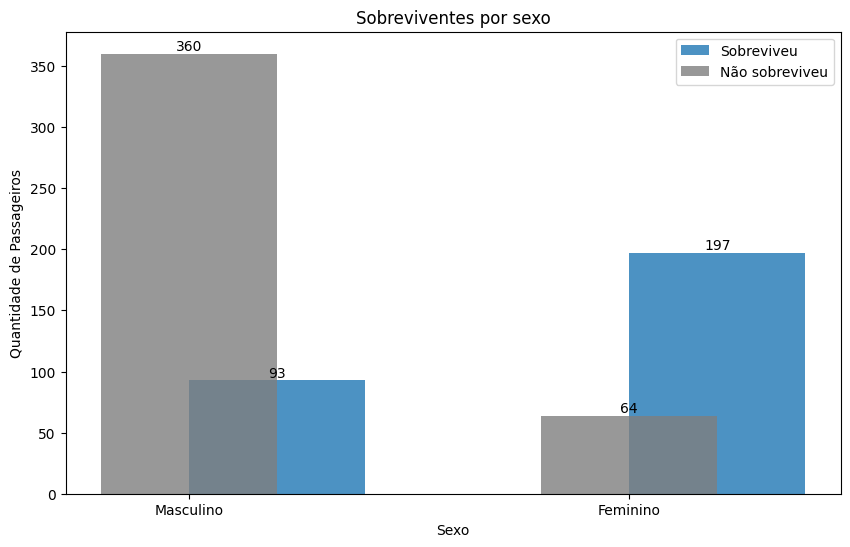

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.bar(
    np.array(["Masculino", "Feminino"]),
    survivors_by_sex.values,
    label="Sobreviveu",
    color=color_tab_blue,
    width=0.4,
    alpha=0.8,
    align="edge",
)

ax.bar(
    np.array(["Masculino", "Feminino"]),
    deaths_by_sex.values,
    label="Não sobreviveu",
    color=color_tab_gray,
    width=0.4,
    alpha=0.8,
)


ax.set_title("Sobreviventes por sexo")
ax.set_xlabel("Sexo")
ax.set_ylabel("Quantidade de Passageiros")

ax.text(0.2, survivors_by_sex[0] + 0.05, survivors_by_sex[0], ha="center", va="bottom")
ax.text(1.2, survivors_by_sex[1] + 0.05, survivors_by_sex[1], ha="center", va="bottom")


ax.text(0, deaths_by_sex[0] + 0.05, deaths_by_sex[0], ha="center", va="bottom")
ax.text(1, deaths_by_sex[1] + 0.05, deaths_by_sex[1], ha="center", va="bottom")

plt.legend(loc="upper right")
plt.show()

In [24]:
survivors_by_sex

Sex
0     93
1    197
Name: Survived, dtype: int64

#### Porcentagem de homens sobreviventes

In [25]:
men_survived_percentage = (survivors_by_sex[0] / titanic_df.loc[(titanic_df["Sex"] == 0)]["Sex"].count()) * 100
men_survived_percentage

20.52980132450331

In [26]:
survived_men_serie = pd.Series(
    [survivors_by_sex[0], titanic_df.loc[(titanic_df["Sex"] == 0) & (titanic_df["Survived"] == 0)]["Sex"].count()]
)

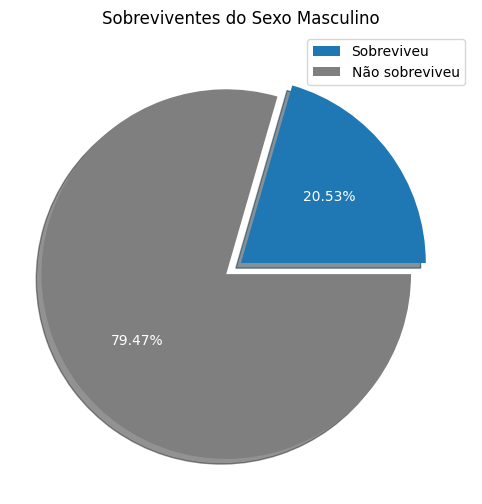

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

patches, texts, autotexts = ax.pie(
    x=survived_men_serie.values,
    autopct="%1.2f%%",
    colors=[color_tab_blue, color_tab_gray],
    shadow=True,
    explode=(0, 0.1),
    textprops={"color": "white"},
)

# patches[0].set_visible(False)

ax.set_title("Sobreviventes do Sexo Masculino")

plt.legend(labels=["Sobreviveu", "Não sobreviveu"], loc="upper right")
plt.show()

#### Porcentagem de mulheres sobreviventes

In [28]:
women_survived_percentage = (survivors_by_sex[1] / titanic_df.loc[(titanic_df["Sex"] == 1)]["Sex"].count()) * 100
women_survived_percentage

75.47892720306514

In [29]:
survived_women_series = pd.Series(
    [survivors_by_sex[1], titanic_df.loc[(titanic_df["Sex"] == 1) & (titanic_df["Survived"] == 0)]["Sex"].count()]
)

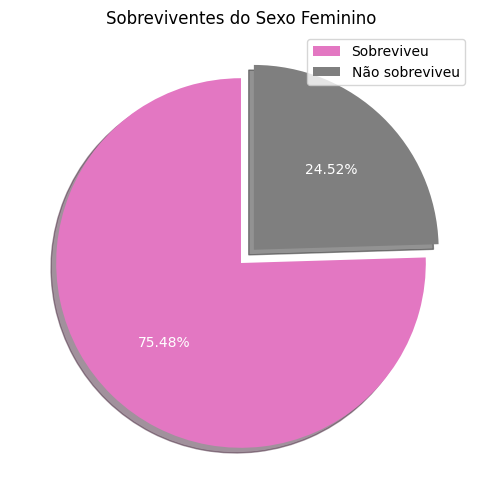

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

patches, texts, autotexts = ax.pie(
    x=survived_women_series.values,
    autopct="%1.2f%%",
    colors=["tab:pink", "tab:gray"],
    explode=(0, 0.1),
    shadow=True,
    startangle=90,
    textprops={"color": "white"},
)

# patches[1].set_visible(False)
# texts[1].set_visible(False)
# autotexts[1].set_visible(False)

ax.set_title("Sobreviventes do Sexo Feminino")

plt.legend(labels=["Sobreviveu", "Não sobreviveu"], loc="upper right")
plt.show()

### Sobreviventes por Idade

In [31]:
survivors_by_age = titanic_df.loc[(titanic_df["Survived"] == 1)][["Age", "Survived"]].groupby("Age").sum().reset_index()
death_by_age = titanic_df.loc[(titanic_df["Survived"] == 0)][["Age", "Survived"]].groupby("Age").count().reset_index()

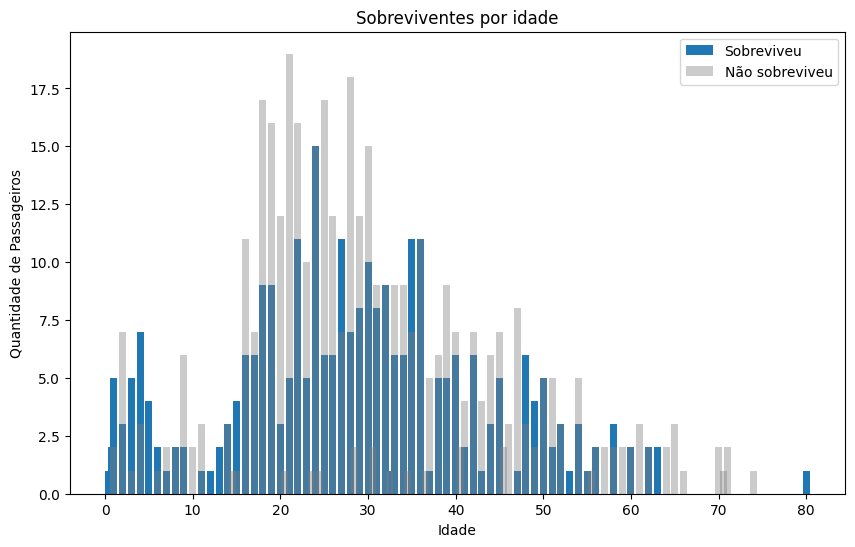

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.bar(survivors_by_age["Age"], survivors_by_age["Survived"], label="Sobreviveu")
ax.bar(death_by_age["Age"], death_by_age["Survived"], label="Não sobreviveu", color=color_tab_gray, alpha=0.4)

ax.set_title("Sobreviventes por idade")
ax.set_xlabel("Idade")
ax.set_ylabel("Quantidade de Passageiros")

plt.legend()
plt.show()

### Sobreviventes por local de embarque

In [33]:
survivors_by_embarked = titanic_df.loc[(titanic_df["Survived"] == 1)][["Embarked", "Survived"]].groupby("Embarked").count().reset_index()
death_by_embarked = titanic_df.loc[(titanic_df["Survived"] == 0)][["Embarked", "Survived"]].groupby("Embarked").count().reset_index()

C:\Users\stevi\AppData\Local\Temp\ipykernel_10692\1824927783.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Cherbourg", "Queenstown", "Southampton"])


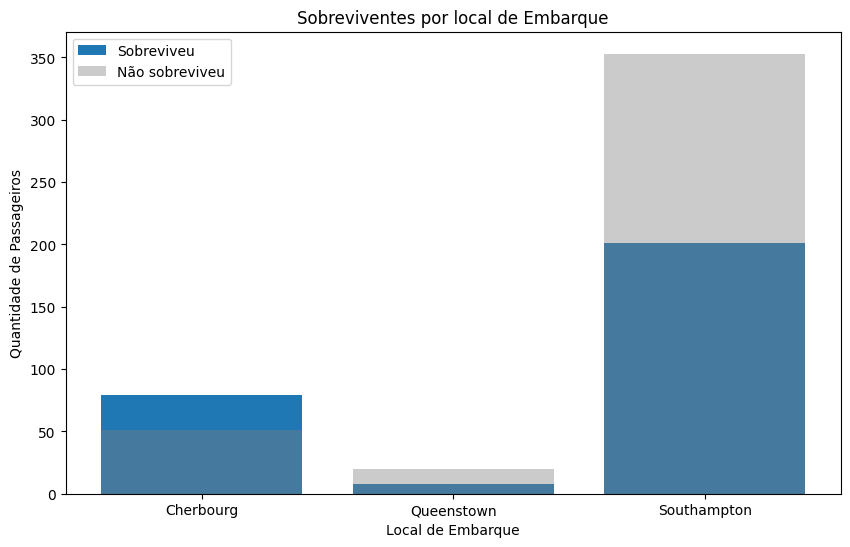

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.bar(survivors_by_embarked["Embarked"], survivors_by_embarked["Survived"], label="Sobreviveu")
ax.bar(
    death_by_embarked["Embarked"],
    death_by_embarked["Survived"],
    label="Não sobreviveu",
    alpha=0.4,
    color=color_tab_gray,
)

ax.set_title("Sobreviventes por local de Embarque")
ax.set_xlabel("Local de Embarque")
ax.set_ylabel("Quantidade de Passageiros")

ax.set_xticklabels(["Cherbourg", "Queenstown", "Southampton"])
ax.set_xticks([0, 1, 2])

plt.legend()
plt.show()

### Sobreviventes por Classe

In [35]:
survivors_by_class = titanic_df.loc[(titanic_df["Survived"] == 1)][["Pclass", "Survived"]].groupby("Pclass").count().reset_index()
death_by_class = titanic_df.loc[(titanic_df["Survived"] == 0)][["Pclass", "Survived"]].groupby("Pclass").count().reset_index()

C:\Users\stevi\AppData\Local\Temp\ipykernel_10692\1252408135.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["1ª Classe", "2ª Classe", "3ª Classe"])


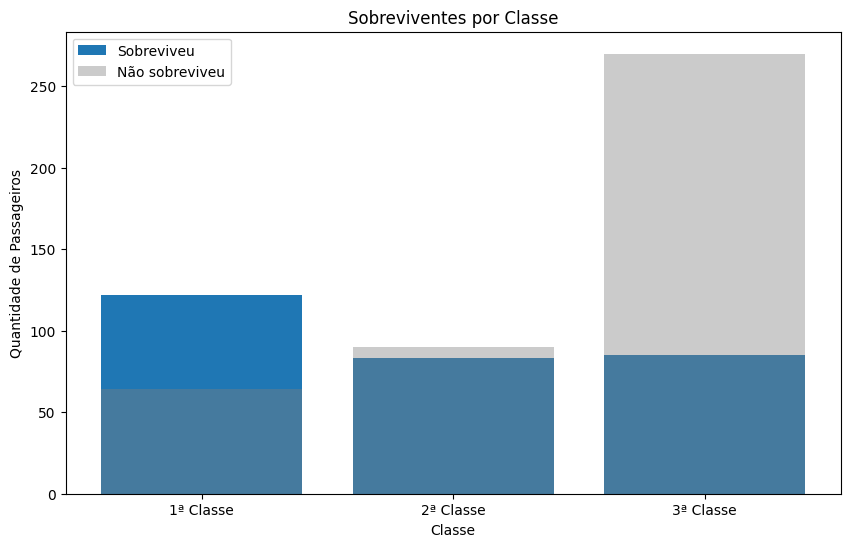

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.bar(survivors_by_class["Pclass"], survivors_by_class["Survived"], label="Sobreviveu")
ax.bar(
    death_by_class["Pclass"],
    death_by_class["Survived"],
    label="Não sobreviveu",
    alpha=0.4,
    color=color_tab_gray,
)

ax.set_title("Sobreviventes por Classe")
ax.set_xlabel("Classe")
ax.set_ylabel("Quantidade de Passageiros")

ax.set_xticklabels(["1ª Classe", "2ª Classe", "3ª Classe"])
ax.set_xticks([1, 2, 3])

plt.legend()
plt.show()

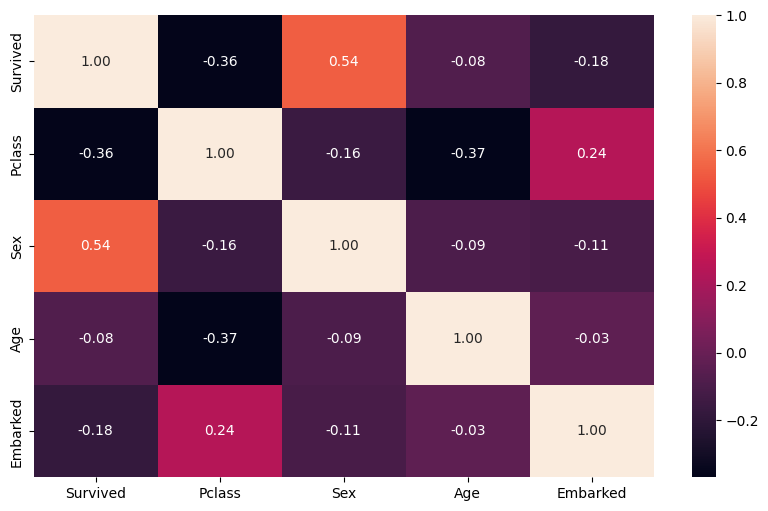

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.heatmap(titanic_df[["Survived", "Pclass", "Sex", "Age", "Embarked"]].corr(), annot=True, fmt=".2f")

plt.show()

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [60]:
titanic_df.dropna(inplace=True)

In [75]:
X = titanic_df.drop(["Survived", "PassengerId"], axis=1)
y = titanic_df["Survived"]  # trying to predict

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [78]:
log_model = LogisticRegression()

In [79]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [80]:
predictions = log_model.predict(X_test)

In [81]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       128
           1       0.72      0.71      0.71        86

    accuracy                           0.77       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214



In [83]:
X

,Pclass,Sex,Age,Embarked
0,3,0,22.0,2.0
1,1,1,38.0,0.0
2,3,1,26.0,2.0
3,1,1,35.0,2.0
4,3,0,35.0,2.0
...,...,...,...,...
885,3,1,39.0,1.0
886,2,0,27.0,2.0
887,1,1,19.0,2.0
889,1,0,26.0,0.0


In [116]:
X_input = pd.DataFrame({"Pclass": [3], "Sex": [1], "Age": [27], "Embarked": [0]})

In [117]:
predictions = log_model.predict(X_input)

In [118]:
"Survive" if predictions[0] == 1 else "Don't survive"

'Survive'

### Referências
- https://github.com/carlosfab/data_science/blob/master/Titanic.ipynb
- https://www.kaggle.com/competitions/titanic
- https://www.kaggle.com/code/roblexnana/data-viz-tutorial-with-titanic-and-seaborn
- https://predictivelearning.github.io/projects/Project_053_Visualizing_Data_with_Seaborn__Titanic.html
- https://dev.to/shehanat/how-to-create-an-age-distribution-graph-using-python-pandas-and-seaborn-2o5n
- https://medium.com/@melodyyip_/titanic-survival-prediction-using-machine-learning-89a779656113
- https://www.kaggle.com/code/dejavu23/titanic-survival-seaborn-and-ensembles
- https://blog.devgenius.io/analyzing-the-titanic-dataset-a-story-of-tragedy-and-survival-48883b2f2d48
- https://www.kaggle.com/code/punit0811/linear-regression-with-titanic-dataset